<a href="https://colab.research.google.com/github/erlakeerthana-2005/Employee_Attritation/blob/main/Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!sudo apt-get install  graphviz # is a system wide for pydot to work
# ! prefix is used for shell commands
#sudo app is used to install the graphviz binaries

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#same as css inline

sns.set_style('whitegrid')

In [ ]:
from google.colab import files
print("upload files")
files.upload()
df=pd.read_csv('Employee_attrition.csv')
df.head()

upload files


Saving Employee_attrition.csv to Employee_attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#basic health of the data/heathcheck
df.shape

(1470, 35)

In [ ]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: xlabel='DistanceFromHome'>

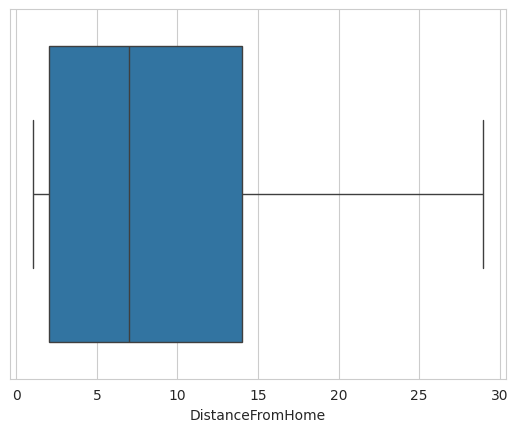

In [ ]:
sns.boxplot(data=df , x="DistanceFromHome")

<Axes: xlabel='Attrition', ylabel='count'>

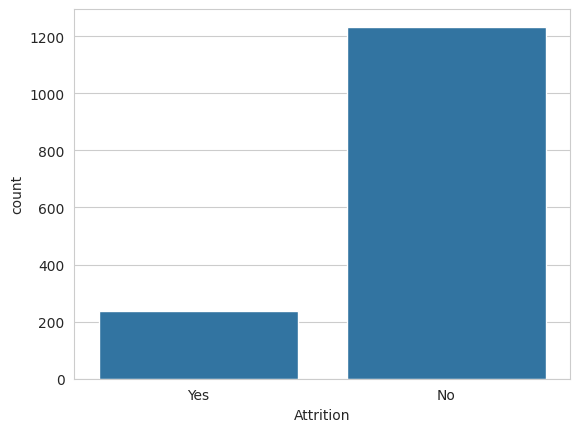

In [ ]:
sns.countplot(data=df , x="Attrition")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis="columns", inplace=True)

In [ ]:
categorical_col = []
for column in df.columns:
  if df[column].dtype == 'object' and len(df[column].unique())<= 50:
    categorical_col.append(column)

In [ ]:
df['Attrition']=df.Attrition.astype("category").cat.codes

In [ ]:
df.columns
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
categorical_col.remove('Attrition')
#remove "Attrition" from  categorical_column list

In [ ]:
#label encoding for other categorical features
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for column in categorical_col:
  df[column]=label.fit_transform(df[column])

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Attrition', axis=1)
y=df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
def print_score(clf,X_train,y_train,X_test,y_test , train = True):
  if train:
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict =True))
    print("Train Result\n==========================")
    print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
    print("------------------------------------------------------")
    print(f"Classfication Report:\n{clf_report}")
    print("----------------------------------------------------")
    print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}")
  elif train == False:
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict =True))
    print("Train Result\n==========================")
    print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%") # Use y_test for accuracy score
    print("------------------------------------------------------")
    print(f"Classfication Report:\n{clf_report}")
    print("----------------------------------------------------")

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
def print_score(clf,X_train,y_train,X_test,y_test , train = True):
  if train:
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict =True))
    print("Train Result\n==========================")
    print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
    print("------------------------------------------------------")
    print(f"Classfication Report:\n{clf_report}")
    print("----------------------------------------------------")
    print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}")
  elif train == False:
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict =True))
    print("Train Result\n==========================")
    print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%") # Use y_test for accuracy score
    print("------------------------------------------------------")
    print(f"Classfication Report:\n{clf_report}")
    print("----------------------------------------------------")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,Y_train)

print_score(tree_clf,X_train, Y_train,X_test,Y_test, train=True)
print_score(tree_clf,X_train,Y_train, X_test,Y_test, train=False)

NameError: name 'Y_train' is not defined